In [1]:
%%HTML
<style type="text/css">

 div.h2 {
     background-color: steelblue; 
     color: white; 
     padding: 8px; 
     padding-right: 300px; 
     font-size: 24px; 
     max-width: 1500px; 
     margin-top: 50px;
     margin-bottom:4px;
 }


# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [2]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import os
import math

%matplotlib inline


# API for students

In [3]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [4]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [7]:
# here we transform all object type to float64 types
cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric,errors = 'coerce')
_=data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

In [8]:
# Since there is no categorical values in our attributes, we don't need encoding here.
# However, since we do have some null value in our attributes, we need to handle missing data.
for i in range(data.shape[1]):
    print(i,data.iloc[:,i].isnull().sum())
# here we see a great portion of attribute #36(X37) is missing. It is not wise to fill in null
# values will statistics of remaining values in that attribute because it is too small part of them.
# we drop X37 here.
data.drop(columns = 'X37',axis = 1,inplace = True)
data.shape

# here we use median as our way to fill in null value in order to avoid getting affected by outliers.
# and double check the nullity
for i in range(data.shape[1]):
    data.iloc[:,i].fillna(data.iloc[:,i].median(),inplace = True)
    print(i,data.iloc[:,i].isnull().sum())

0 2
1 2
2 2
3 15
4 10
5 2
6 2
7 14
8 0
9 2
10 2
11 15
12 0
13 2
14 6
15 14
16 14
17 2
18 0
19 0
20 74
21 2
22 0
23 116
24 2
25 14
26 305
27 83
28 2
29 0
30 0
31 42
32 15
33 14
34 2
35 2
36 2068
37 2
38 0
39 15
40 62
41 0
42 0
43 0
44 220
45 15
46 31
47 2
48 0
49 14
50 2
51 32
52 83
53 83
54 0
55 0
56 2
57 0
58 2
59 220
60 12
61 0
62 15
63 83
64 0
65 0


(4818, 65)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0


In [9]:
# lets look at the head and tail of our data after cleaning
data.info()
data.head()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   float64
 1   X2        4818 non-null   float64
 2   X3        4818 non-null   float64
 3   X4        4818 non-null   float64
 4   X5        4818 non-null   float64
 5   X6        4818 non-null   float64
 6   X7        4818 non-null   float64
 7   X8        4818 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   float64
 10  X11       4818 non-null   float64
 11  X12       4818 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   float64
 14  X15       4818 non-null   float64
 15  X16       4818 non-null   float64
 16  X17       4818 non-null   float64
 17  X18       4818 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   floa

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.310,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.580,3.1854,2.7420,0,1529


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.8579,0.9842,0.79415,...,0.266940,0.73275,0.022101,9.0389,3.5081,66.1710,5.5160,1.4476,0,1985
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.0422,1.0516,0.90042,...,0.346400,0.70705,0.044114,14.0180,7.0618,20.7760,17.5680,2.9149,0,3963
4815,-0.029746,0.448980,0.39136,1.93880,7.8073,-0.020006,-0.030561,1.2259,1.0001,0.55040,...,-0.054046,0.99986,0.058336,15.5470,8.7022,34.3700,10.6200,23.0860,0,4167
4816,0.284730,0.079573,0.46261,6.81370,-81.1580,-0.795510,0.284730,11.5670,6.0718,0.92043,...,0.309350,0.19889,0.000000,9.0389,28.5000,4.7834,76.3050,13.2630,0,1579
4817,0.120090,0.630720,-0.10501,0.81336,-43.2260,-0.174920,0.154240,0.5855,3.1990,0.36928,...,0.325200,0.04347,0.000000,12.8250,16.4410,64.1950,5.6858,5.8982,0,3294


In [10]:
data.drop(columns = ['Id'], inplace = True)

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [11]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Deal with outliers

In [12]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
count,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,...,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,-0.055190,0.533238,0.189005,4.968215,1.952457e+01,-0.070031,-0.042475,5.726644,1.579277,0.503614,...,0.056109,0.022829,0.959585,0.272915,1.058578e+03,11.009237,177.494445,9.274060,37.963538,0.063927
std,6.705959,1.202661,1.282164,100.117878,2.382015e+04,7.776908,6.706577,109.349029,1.342723,4.043196,...,0.755462,7.247518,0.932427,6.337287,6.942420e+04,43.767195,2279.713700,113.049754,583.635234,0.244648
min,-463.890000,0.000000,-72.067000,0.000000,-1.076400e+06,-463.890000,-463.890000,-3.735100,0.000191,-71.444000,...,-46.788000,-468.670000,-0.085920,-184.980000,-1.244000e+01,-0.092493,0.000000,0.000000,-3.726500,0.000000
25%,0.004061,0.254765,0.044978,1.101525,-4.290075e+01,0.000000,0.005989,0.482350,1.015600,0.319095,...,0.011478,0.015581,0.876940,0.000000,5.456550e+00,4.236425,45.065750,3.077000,2.137425,0.000000
50%,0.046487,0.451495,0.218560,1.642300,3.673450e-01,0.000000,0.056685,1.149000,1.140500,0.522325,...,0.053663,0.108940,0.950825,0.006320,9.038900e+00,6.176800,73.879500,4.928700,4.077200,0.000000
75%,0.116725,0.662140,0.420033,2.922650,4.978025e+01,0.110387,0.135972,2.770800,1.814050,0.721670,...,0.124030,0.240200,0.990358,0.206643,1.631125e+01,9.294575,118.597500,8.051800,9.012525,0.000000
max,2.352300,72.416000,28.336000,6845.800000,1.250100e+06,203.150000,2.352300,6868.500000,37.807000,266.860000,...,1.000000,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,127450.000000,7641.300000,28999.000000,1.000000


In [13]:
data_std_describe = data.describe().loc['std',:]
extreme_cols = data_std_describe[data_std_describe>10000].index.values
regular_cols = [col for col in data.columns[:-1] if col not in extreme_cols]

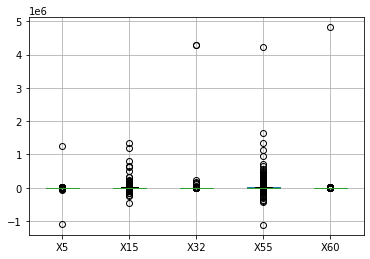

In [14]:
data.loc[:,extreme_cols].boxplot()

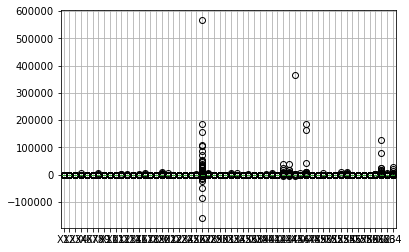

In [15]:
data.loc[:,regular_cols].boxplot()

### From the above graph, we want to first eliminate the outlier in the dataset

In [16]:
from scipy import stats
def drop_numerical_outliers(df, z_thresh=3):
    print('Before dropping outliers: ', df.shape)
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.iloc[:,:-1].apply(lambda x: np.abs(stats.zscore(x)) < z_thresh).all(axis=1)

    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    print('After dropping outliers: ', df.shape)

In [17]:
drop_numerical_outliers(data)

Before dropping outliers:  (4818, 64)
After dropping outliers:  (4526, 64)


## Create a test set

In [18]:
# seperate dependent variables and independent variables
y = data['Bankrupt']
X = data.loc[:,'X1':'X64']
print(f'The shape of y is {y.shape}')
print(f'The shape of X is {X.shape}')

# do a random shuffle to make sure that no premade pattern exist in dataset
y, X = sklearn.utils.shuffle(y, X, random_state = 42)

The shape of y is (4526,)
The shape of X is (4526, 63)


In [19]:
from sklearn.model_selection import train_test_split
X_train = None
X_test = None
y_train = None
y_test = None
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_test is {y_test.shape}')
print(f'The shape of X_test is {X_test.shape}')

The shape of y_train is (4073,)
The shape of X_train is (4073, 63)
The shape of y_test is (453,)
The shape of X_test is (453, 63)


## Look at our train sample. See if there exists an imbalanced data

In [20]:
y_train.sum() # how many companies go bankrupt in our train sample
print(f'the fraction of bankrupt over all our training set is {y_train.sum()/y_train.shape[0]}')
# we see that there is a huge inbalance between bankrupt and unbankrupt categories.
# what we can do is the following:
# 1. use unconditional matrix to measure our performance, which we will.
# 2. try to use decision tree as our model, which is indifferent to imbalanced input
# 3. try to use loss sensitive learning

233

the fraction of bankrupt over all our training set is 0.05720599067026762


## Exploratory Data Analysis

### According to our financial background, we know that bankrupt probability is mainly reflected on the following ratios has liability in them:
X2 total liabilities / total assets
X4 current assets / short-term liabilities
X8 book value of equity / total liabilities
X15 (total liabilities * 365) / (gross profit + depreciation)
X16 (gross profit + depreciation) / total liabilities
X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
...

<Figure size 1152x864 with 0 Axes>

Text(0.5, 1.0, 'total liabilities/ total assets')

Text(0, 0.5, 'ratio')

Text(0.5, 1.0, 'current assets / short-term liabilities')

Text(0, 0.5, 'ratio')

Text(0.5, 1.0, 'book value of equity / total liabilities')

Text(0, 0.5, 'ratio')

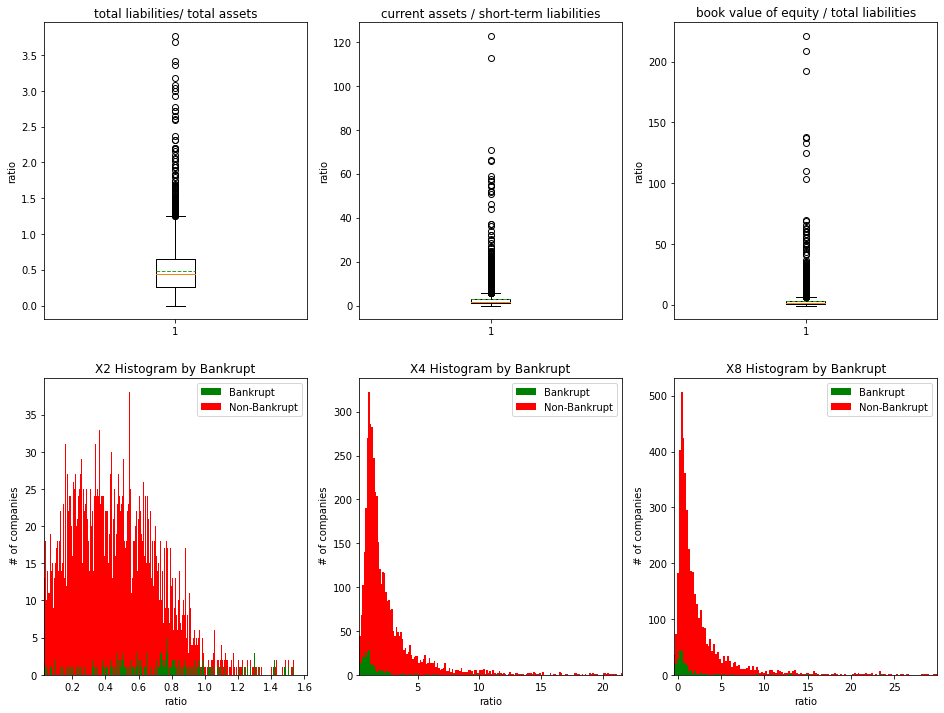

In [21]:
plt.figure(figsize = [16,12])
plt.subplot(231)
_=plt.boxplot(x=data['X2'], showmeans = True, meanline = True)
plt.title('total liabilities/ total assets')
plt.ylabel('ratio')

plt.subplot(232)
_=plt.boxplot(x=data['X4'], showmeans = True, meanline = True)
plt.title('current assets / short-term liabilities')
plt.ylabel('ratio')

plt.subplot(233)
_=plt.boxplot(x=data['X8'], showmeans = True, meanline = True)
plt.title('book value of equity / total liabilities')
plt.ylabel('ratio')

plt.subplot(234)
_=plt.hist(x = [data[data['Bankrupt']==1]['X2'], data[data['Bankrupt']==0]['X2']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 1000)
_=plt.title('X2 Histogram by Bankrupt')
_=plt.xlim(data['X2'].quantile(0.01),data['X2'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()


plt.subplot(235)
_=plt.hist(x = [data[data['Bankrupt']==1]['X4'], data[data['Bankrupt']==0]['X4']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 1000)
_=plt.title('X4 Histogram by Bankrupt')
_=plt.xlim(data['X4'].quantile(0.01),data['X4'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()



plt.subplot(236)
_=plt.hist(x = [data[data['Bankrupt']==1]['X8'], data[data['Bankrupt']==0]['X8']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 1000)
_=plt.title('X8 Histogram by Bankrupt')
_=plt.xlim(data['X8'].quantile(0.01),data['X8'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

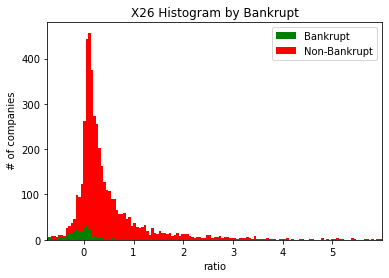

In [22]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X26'], data[data['Bankrupt']==0]['X26']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X26 Histogram by Bankrupt')
_=plt.xlim(data['X26'].quantile(0.01),data['X26'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

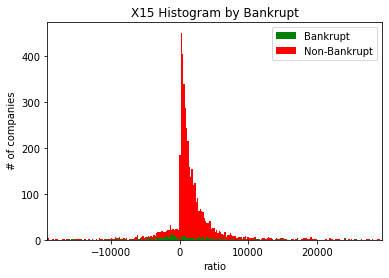

In [23]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X15'], data[data['Bankrupt']==0]['X15']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 1000)
_=plt.title('X15 Histogram by Bankrupt')
_=plt.xlim(data['X15'].quantile(0.01),data['X15'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

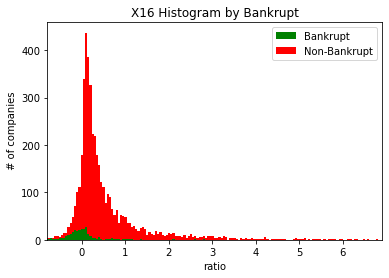

In [24]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X16'], data[data['Bankrupt']==0]['X16']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X16 Histogram by Bankrupt')
_=plt.xlim(data['X16'].quantile(0.01),data['X16'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

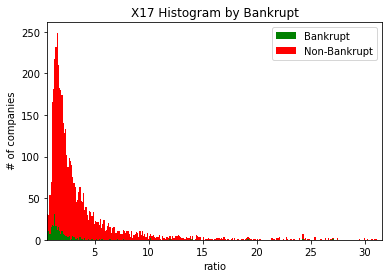

In [25]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X17'], data[data['Bankrupt']==0]['X17']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X17 Histogram by Bankrupt')
_=plt.xlim(data['X17'].quantile(0.01),data['X17'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

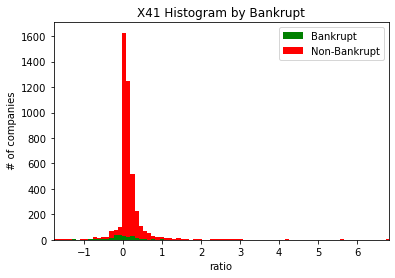

In [26]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X41'], data[data['Bankrupt']==0]['X41']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 5000)
_=plt.title('X41 Histogram by Bankrupt')
_=plt.xlim(data['X41'].quantile(0.01),data['X41'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

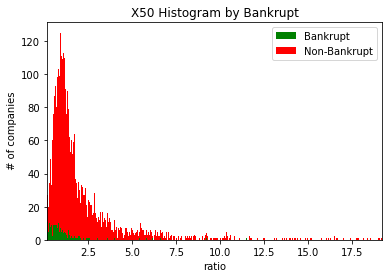

In [27]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X50'], data[data['Bankrupt']==0]['X50']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 3000)
_=plt.title('X50 Histogram by Bankrupt')
_=plt.xlim(data['X50'].quantile(0.01),data['X50'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

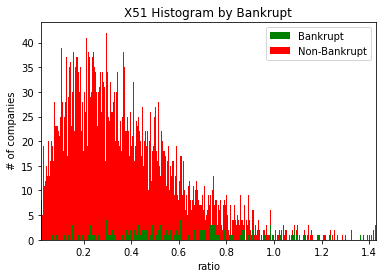

In [28]:
# from this histgram, we see that if stort-term liability/ asset is beyond a certain threshold
# the default probabilty siginificantly increase. So it is a good indictor.
_=plt.hist(x = [data[data['Bankrupt']==1]['X51'], data[data['Bankrupt']==0]['X51']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 1000)
_=plt.title('X51 Histogram by Bankrupt')
_=plt.xlim(data['X51'].quantile(0.01),data['X51'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

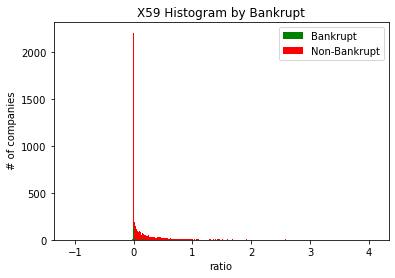

In [29]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X59'], data[data['Bankrupt']==0]['X59']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X59 Histogram by Bankrupt')
_=plt.xlim(data['X59'].quantile(0.01),data['X59'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

In [30]:
# Conclusion: X2, X41, X51, X59 should be helpful indicators

### Check some attributes does not include liabilities

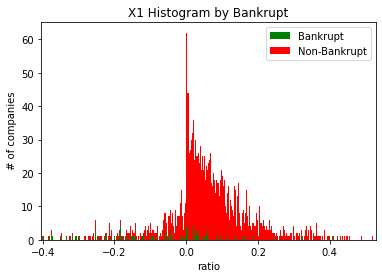

In [31]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X1'], data[data['Bankrupt']==0]['X1']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 3000)
_=plt.title('X1 Histogram by Bankrupt')
_=plt.xlim(data['X1'].quantile(0.01),data['X1'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

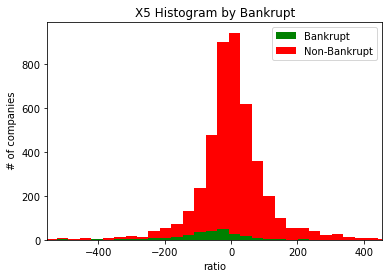

In [32]:
# we can easily see that when X5 is below zero, the probability that the firm go bankrupt is obviously higher.
_=plt.hist(x = [data[data['Bankrupt']==1]['X5'], data[data['Bankrupt']==0]['X5']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 3000)
_=plt.title('X5 Histogram by Bankrupt')
_=plt.xlim(data['X5'].quantile(0.01),data['X5'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

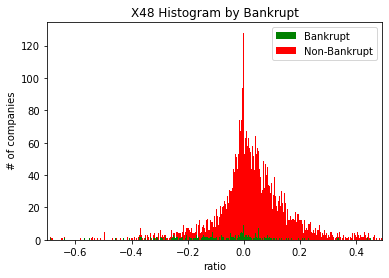

In [33]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X48'], data[data['Bankrupt']==0]['X48']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X48 Histogram by Bankrupt')
_=plt.xlim(data['X48'].quantile(0.01),data['X48'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

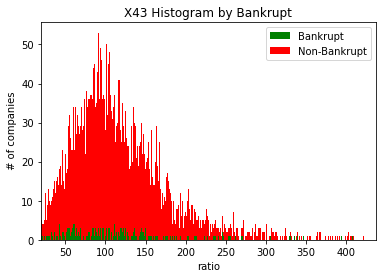

In [34]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X43'], data[data['Bankrupt']==0]['X43']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X43 Histogram by Bankrupt')
_=plt.xlim(data['X43'].quantile(0.01),data['X43'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

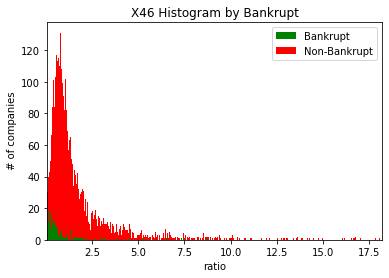

In [35]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X46'], data[data['Bankrupt']==0]['X46']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 3000)
_=plt.title('X46 Histogram by Bankrupt')
_=plt.xlim(data['X46'].quantile(0.01),data['X46'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

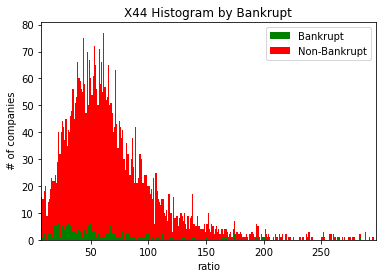

In [36]:
# extreamly small or large X44 implies possibility of going to bankrupt.
_=plt.hist(x = [data[data['Bankrupt']==1]['X44'], data[data['Bankrupt']==0]['X44']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X44 Histogram by Bankrupt')
_=plt.xlim(data['X44'].quantile(0.01),data['X44'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

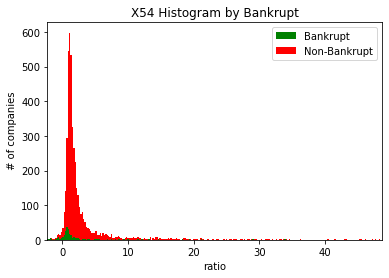

In [37]:
_=plt.hist(x = [data[data['Bankrupt']==1]['X54'], data[data['Bankrupt']==0]['X54']], 
         stacked=True, color = ['g','r'],label = ['Bankrupt','Non-Bankrupt'], bins = 2000)
_=plt.title('X54 Histogram by Bankrupt')
_=plt.xlim(data['X54'].quantile(0.01),data['X54'].quantile(0.99))
_=plt.xlabel('ratio')
_=plt.ylabel(' # of companies')
_=plt.legend()

In [38]:
# Conclusion: X1, X5, X48, X43, X44 maybe helpful indicators

### Show the correlations between selected attributes and our target variable

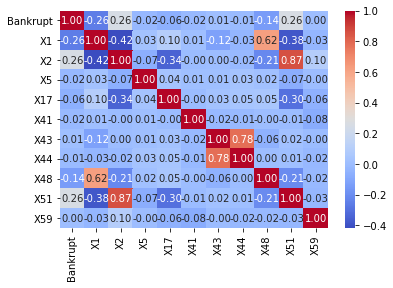

In [39]:
_ = sns.heatmap(data[["Bankrupt","X1","X2","X5","X17","X41","X43","X44","X48","X51","X59"]].corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

In [40]:
# from the correlation map above, we see that (X43,X44) and (X2,X51) and(X48,X1) are almost perfectly correlated
# so we should only use X1, X2, X5, X43, X59, X41, X17


In [41]:
data["X17"].describe()

count    4526.000000
mean        4.154109
std         8.912602
min         0.265340
25%         1.530350
50%         2.238700
75%         3.912200
max       222.200000
Name: X17, dtype: float64

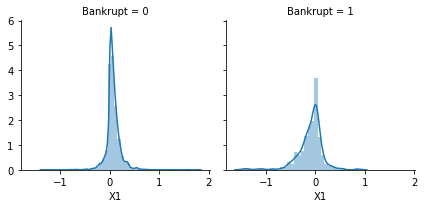

In [42]:
#from the graph, we see that if X1 significantly smaller than 0, we get bankrupt.
g = sns.FacetGrid(data, col='Bankrupt')
_ = g.map(sns.distplot, "X1")

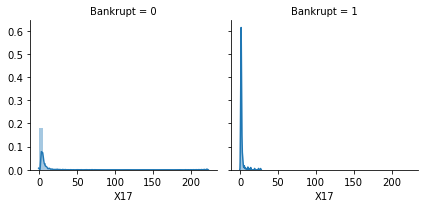

In [43]:
# we can generate a categorical varable to indicate X17 around 0 or not?
# this is too inbalance, maybe not a good choice for indicator

g = sns.FacetGrid(data, col='Bankrupt')
_= g.map(sns.distplot, "X17")

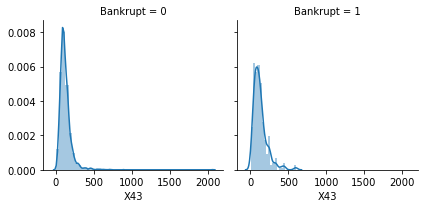

In [44]:
g = sns.FacetGrid(data, col='Bankrupt')
_= g.map(sns.distplot, "X43")

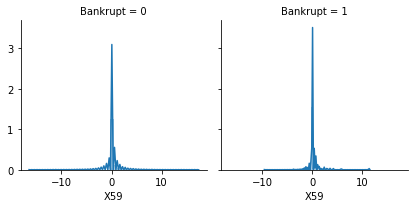

In [45]:
g = sns.FacetGrid(data, col='Bankrupt')
_= g.map(sns.distplot, "X59")

### Conclusions:
1: Among 64 provided attributes, we get some intuitive ideas about which attributes is going to have an impact on bankrupt.

2: From the correlation matrix (heat map), we can conclude that 64 attributes are not independent at all, some of them are even perfectly correlated. It implies we can try to use PCA to extract some main components that drive the variance.

## Go beyond EDA, lets try Principle Component Analysis

### Perform PCA on our attributes

In [46]:
# before performing PCA decomposition, we first need to standarize our input data in order to match PCA's assumption.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std = StandardScaler()
std.fit(X)
X_std = std.transform(X) # now we have our input data centered at zero
pca_model = PCA(n_components = 0.95)
pca_model.fit(X_std)
X_pca_transformed = pca_model.transform(X_std)
print(f'our pca_model extract {X_pca_transformed.shape[1]} principles in order to keep 95% of variance.') 

StandardScaler()

PCA(n_components=0.95)

our pca_model extract 31 principles in order to keep 95% of variance.


In [47]:
pca_model.components_.shape

(31, 63)

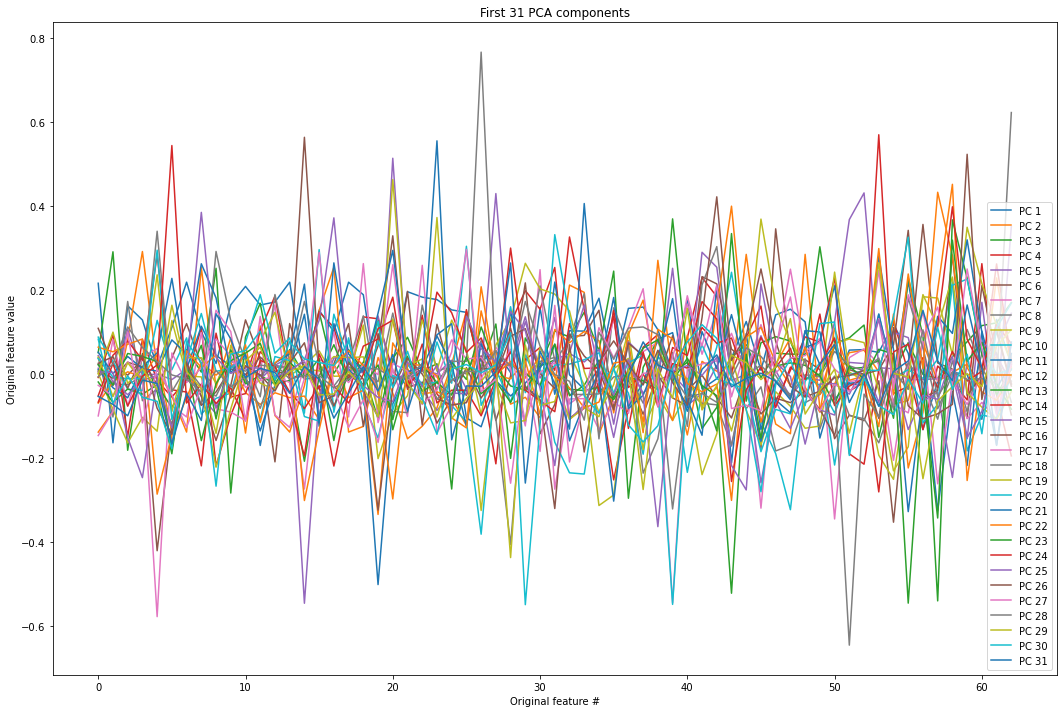

In [48]:
fig, ax = plt.subplots(1,1, figsize=(18,12))
_=ax.set_title('First {0} PCA components'.format(np.shape(np.transpose(pca_model.components_))[-1]))

_=ax.plot(np.transpose(pca_model.components_) )
xlabel="Original feature #"
_=ax.set_xlabel(xlabel)
ylabel="Original feature value"
_=ax.set_ylabel(ylabel)

_=ax.legend(["PC 1", "PC 2", "PC 3","PC 4", "PC 5", "PC 6","PC 7", "PC 8", "PC 9","PC 10", "PC 11", "PC 12","PC 13", 
           "PC 14", "PC 15", "PC 16","PC 17", "PC 18", "PC 19","PC 20", "PC 21", "PC 22","PC 23",
             "PC 24", "PC 25", "PC 26","PC 27", "PC 28", "PC 29","PC 30", "PC 31"])

### Analyze first five principles, and see if we can get some sense about relationships between futures

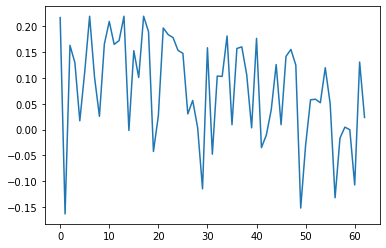

In [49]:
# the first principle component
plt.plot(np.transpose(pca_model.components_[0]))
# refer to the given attributes meaning, I guess principle 1 extract the average performance/ profitability of a firm.
# However, since some ratios maybe good or bad, the weights fluctuates above and below the zero line.

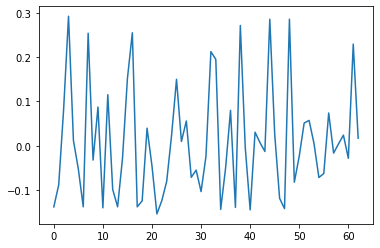

In [50]:
# the second principle component
plt.plot(np.transpose(pca_model.components_[1]))
# from the graph shown below, the synthetic feature has positive values around X4,X8,X12,X18,X25,X32,X38,X43,X48,X63
# refer to the given attributes meaning, I guess principle 2 extract those attributes has liability as its demoninator.

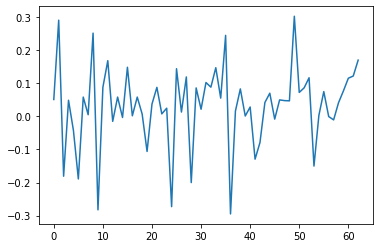

In [51]:
# the third principle component
plt.plot(np.transpose(pca_model.components_[2]))

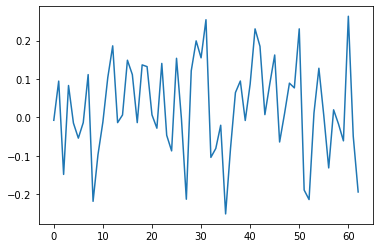

In [52]:
# the fourth principle component
plt.plot(np.transpose(pca_model.components_[3]))

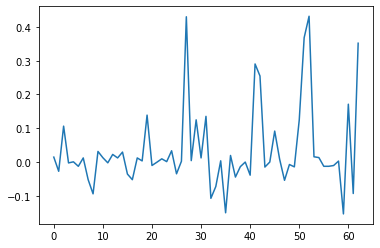

In [53]:
# the fifth principle component
plt.plot(np.transpose(pca_model.components_[4]))

## Model Data (on EDA selected & PCA  attributes)

### Import some useful module

In [54]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import pipeline
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [55]:
# modify our train set to only include five attributes we discussed above.
# for future use
EDA_X_train = X_train.loc[:,['X1', 'X2','X5','X43', 'X59', 'X41']]
EDA_y_train = y_train
EDA_X_test = X_test.loc[:,['X1', 'X2','X5','X43', 'X59', 'X41']]
EDA_y_test = y_test

In [56]:
EDA_X_train.shape
EDA_y_train.shape

(4073, 6)

(4073,)

In [57]:
from sklearn.pipeline import Pipeline
scalar = StandardScaler()
pca = PCA(n_components = 0.95)

transform_pipe = Pipeline(steps = [('scalar',scalar),
                                   ('PCA',pca)])
transform_pipe.fit(X_train)
PCA_X_train = transform_pipe.transform(X_train)
PCA_X_train.shape
PCA_y_train = y_train
PCA_X_test = transform_pipe.transform(X_test)
PCA_y_test = y_test

Pipeline(steps=[('scalar', StandardScaler()), ('PCA', PCA(n_components=0.95))])

(4073, 31)

### A list of models we may use as our model for this dataset:

In [58]:
MLM = [
    ensemble.AdaBoostClassifier(random_state = 0),
    ensemble.BaggingClassifier(random_state = 0),
    ensemble.GradientBoostingClassifier(random_state = 0),
    ensemble.RandomForestClassifier(random_state = 0),
    
    #logistic regression
    
    linear_model.LogisticRegression(C=100. / EDA_X_train.shape[0],  # n.b. C is 1/(regularization penalty)
                                 multi_class='multinomial',
                                 penalty='l2',   # n.b., "l1" loss: sparsity (number of non-zero) >> "l2" loss (dafault)
                                 solver='saga', tol=0.01),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
]

### Build a pipeline for each model and test its cross_validation accuracy score on EDA_attributes and PCA_attributes

In [59]:
from sklearn.pipeline import Pipeline
scalar = None
scalar = StandardScaler()
scalar_pipe = Pipeline(steps = [('scalar',scalar)])

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 70/20 split intentionally leaving out 10%

#create table to compare MLA metrics
MLM_columns = ['MLM Name', 'MLM Parameters','MLM Train Accuracy Mean', 'MLM Test Accuracy Mean', 'MLM Test Accuracy 3*STD' ,'MLM Time']
MLM_compare_EDA = pd.DataFrame(columns = MLM_columns)

#create table to compare MLA predictions
#MLM_predict = y_train

#index through MLA and save performance to table
row_index = 0
for alg in MLM:
    
    algo = alg
    my_pipeline = Pipeline(steps = [('scalar',scalar),
                                    ('classifier',algo)])

    #set name and parameters
    MLM_name = alg.__class__.__name__
    MLM_compare_EDA.loc[row_index, 'MLM Name'] = MLM_name
    MLM_compare_EDA.loc[row_index, 'MLM Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(my_pipeline, EDA_X_train, EDA_y_train, cv  = cv_split,return_train_score = True)

    MLM_compare_EDA.loc[row_index, 'MLM Time'] = cv_results['fit_time'].mean()
    MLM_compare_EDA.loc[row_index, 'MLM Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLM_compare_EDA.loc[row_index, 'MLM Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLM_compare_EDA.loc[row_index, 'MLM Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
     
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLM_compare_EDA.sort_values(by = ['MLM Test Accuracy Mean'], ascending = False, inplace = True)
MLM_compare_EDA

,MLM Name,MLM Parameters,MLM Train Accuracy Mean,MLM Test Accuracy Mean,MLM Test Accuracy 3*STD,MLM Time
4,LogisticRegression,"{'C': 0.024551927326295114, 'class_weight': No...",0.945247,0.942209,0.0124774,0.0177644
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.947738,0.941595,0.0137926,0.127769
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.949737,0.939141,0.0128782,0.00965934
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.991477,0.937669,0.0137533,0.143659
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.937669,0.0139489,0.572625
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.948509,0.937301,0.017064,0.218164
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.968923,0.937178,0.0113813,0.592007
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.90589,0.0182608,0.026844
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.879797,0.879018,0.131841,0.00740135


In [60]:
from sklearn.pipeline import Pipeline
scalar = None
scalar = StandardScaler()
scalar_pipe = Pipeline(steps = [('scalar',scalar)])

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 70/20 split intentionally leaving out 10%

#create table to compare MLA metrics
MLM_columns = ['MLM Name', 'MLM Parameters','MLM Train Accuracy Mean', 'MLM Test Accuracy Mean', 'MLM Test Accuracy 3*STD' ,'MLM Time']
MLM_compare_PCA = pd.DataFrame(columns = MLM_columns)

#create table to compare MLA predictions
#MLM_predict = y_train

#index through MLA and save performance to table
row_index = 0
for alg in MLM:
    
    algo = alg
    my_pipeline = Pipeline(steps = [('scalar',scalar),
                                    ('classifier',algo)])

    #set name and parameters
    MLM_name = alg.__class__.__name__
    MLM_compare_PCA.loc[row_index, 'MLM Name'] = MLM_name
    MLM_compare_PCA.loc[row_index, 'MLM Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(my_pipeline, PCA_X_train, PCA_y_train, cv  = cv_split,return_train_score = True)

    MLM_compare_PCA.loc[row_index, 'MLM Time'] = cv_results['fit_time'].mean()
    MLM_compare_PCA.loc[row_index, 'MLM Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLM_compare_PCA.loc[row_index, 'MLM Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLM_compare_PCA.loc[row_index, 'MLM Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
     
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLM_compare_PCA.sort_values(by = ['MLM Test Accuracy Mean'], ascending = False, inplace = True)
MLM_compare_PCA

,MLM Name,MLM Parameters,MLM Train Accuracy Mean,MLM Test Accuracy Mean,MLM Test Accuracy 3*STD,MLM Time
4,LogisticRegression,"{'C': 0.024551927326295114, 'class_weight': No...",0.949737,0.943926,0.012214,0.0510725
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.952403,0.942086,0.0132515,0.00619514
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.94135,0.0119618,1.27078
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.954647,0.941104,0.013871,0.129627
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.991722,0.938405,0.0138515,0.631424
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.975938,0.93816,0.0178214,2.77424
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.952192,0.935951,0.015425,0.694629
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.899141,0.0257037,0.108879
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.892283,0.890184,0.0341062,0.00616257


## Let's investigate how can we improve the model

In [61]:
data['Bankrupt'].sum()
data.shape[0]
acc = 1 - data['Bankrupt'].sum()/data.shape[0]
print(f'We notice that the baseline accuracy of our model is to predict all the companies to None-bankrupt and this will give us total accuracy = {acc}') 

266

4526

We notice that the baseline accuracy of our model is to predict all the companies to None-bankrupt and this will give us total accuracy = 0.9412284577993814


With the baseline model in our mind, we look at the results given by models in MLM listed above. Only few Ensamble Models beat the baseline model! 

That obviously not the whole objective we want here, our main goal is to predict the bankrupt, we need to investigate the accuracy of model conditional on bankrupt cases.

### Look at the conditional accuracy to determine model performance on PCA_attributes

In [62]:
# since it is a highly imbalanced dataset, we can try to adjust the class_weight of our models
balanced_MLM = [
    ensemble.AdaBoostClassifier(random_state = 0),
    ensemble.BaggingClassifier(random_state = 0),
    ensemble.GradientBoostingClassifier(random_state = 0),
    ensemble.RandomForestClassifier(class_weight = 'balanced'),
    
    #logistic regression
    
    linear_model.LogisticRegression(C=100. / EDA_X_train.shape[0],  # n.b. C is 1/(regularization penalty)
                                 multi_class='multinomial', class_weight = 'balanced',
                                 penalty='l2',   # n.b., "l1" loss: sparsity (number of non-zero) >> "l2" loss (dafault)
                                 solver='saga', tol=0.01),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(class_weight = 'balanced'),
    
    #Trees    
    tree.DecisionTreeClassifier(class_weight = 'balanced'),
]

### Models run on all attributes

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# create table to collect conditional accuracy on different models
MLM_ALLcolumns_conditional = ['MLM Name','MLM Parameters','MLM Train_accuracy','MLM Train_recall', 'MLM Train_precision',
                           'MLM Test_accuracy','MLM Test_recall', 'MLM Test_precision']
MLM_ALLcompare_conditional = pd.DataFrame(columns= MLM_ALLcolumns_conditional)

row_index = 0
for alg in balanced_MLM:
    
    algo = alg
    my_pipeline = Pipeline(steps = [('classifier',algo)])

    #set name and parameters
    MLM_name = alg.__class__.__name__
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Name'] = MLM_name
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Parameters'] = str(alg.get_params())
    
    algo.fit(X_train,y_train)
    test_predict = algo.predict(X_test)
    train_predict = algo.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predict)
    recall_train = recall_score(y_train, train_predict, pos_label=1, average="binary")
    precision_train = precision_score(y_train, train_predict, pos_label=1, average="binary")
    accuracy_test = accuracy_score(y_test, test_predict)
    recall_test = recall_score(y_test, test_predict, pos_label=1, average="binary")
    precision_test = precision_score(y_test, test_predict, pos_label=1, average="binary")
    

    MLM_ALLcompare_conditional.loc[row_index, 'MLM Train_accuracy'] = accuracy_train
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Train_recall'] = recall_train
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Train_precision'] = precision_train
    
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Test_accuracy'] = accuracy_test
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Test_recall'] = recall_test
    MLM_ALLcompare_conditional.loc[row_index, 'MLM Test_precision'] = precision_test
    
    row_index+=1
    
MLM_ALLcompare_conditional.sort_values(by = ['MLM Test_recall'], ascending = False, inplace = True)
MLM_ALLcompare_conditional

AdaBoostClassifier(random_state=0)

BaggingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

RandomForestClassifier(class_weight='balanced')

LogisticRegression(C=0.024551927326295114, class_weight='balanced',
                   multi_class='multinomial', solver='saga', tol=0.01)

GaussianNB()

KNeighborsClassifier()

SVC(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

,MLM Name,MLM Parameters,MLM Train_accuracy,MLM Train_recall,MLM Train_precision,MLM Test_accuracy,MLM Test_recall,MLM Test_precision
4,LogisticRegression,"{'C': 0.024551927326295114, 'class_weight': 'b...",0.715689,0.716738,0.132645,0.721854,0.727273,0.170213
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.71888,0.725322,0.1352,0.719647,0.727273,0.169014
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.746133,0.738197,0.150218,0.730684,0.636364,0.160305
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",1,1,1,0.931567,0.606061,0.526316
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.984532,0.729614,1,0.953642,0.484848,0.8
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.963172,0.459227,0.816794,0.951435,0.424242,0.823529
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.992143,0.862661,1,0.951435,0.424242,0.823529
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,1,1,0.940397,0.272727,0.75
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.946722,0.154506,0.642857,0.927152,0.0909091,0.5


### Models run on EDA attributes

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# create table to collect conditional accuracy on different models
MLM_EDAcolumns_conditional = ['MLM Name','MLM Parameters','MLM Train_accuracy','MLM Train_recall', 'MLM Train_precision',
                           'MLM Test_accuracy','MLM Test_recall', 'MLM Test_precision']
MLM_EDAcompare_conditional = pd.DataFrame(columns= MLM_EDAcolumns_conditional)

row_index = 0
for alg in balanced_MLM:
    
    algo = alg
    my_pipeline = Pipeline(steps = [('classifier',algo)])

    #set name and parameters
    MLM_name = alg.__class__.__name__
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Name'] = MLM_name
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Parameters'] = str(alg.get_params())
    
    algo.fit(EDA_X_train,EDA_y_train)
    test_predict = algo.predict(EDA_X_test)
    train_predict = algo.predict(EDA_X_train)
    accuracy_train = accuracy_score(EDA_y_train, train_predict)
    recall_train = recall_score(EDA_y_train, train_predict, pos_label=1, average="binary")
    precision_train = precision_score(EDA_y_train, train_predict, pos_label=1, average="binary")
    accuracy_test = accuracy_score(EDA_y_test, test_predict)
    recall_test = recall_score(EDA_y_test, test_predict, pos_label=1, average="binary")
    precision_test = precision_score(EDA_y_test, test_predict, pos_label=1, average="binary")
    

    MLM_EDAcompare_conditional.loc[row_index, 'MLM Train_accuracy'] = accuracy_train
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Train_recall'] = recall_train
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Train_precision'] = precision_train
    
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Test_accuracy'] = accuracy_test
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Test_recall'] = recall_test
    MLM_EDAcompare_conditional.loc[row_index, 'MLM Test_precision'] = precision_test
    
    row_index+=1
    
MLM_EDAcompare_conditional.sort_values(by = ['MLM Test_recall'], ascending = False, inplace = True)
MLM_EDAcompare_conditional

AdaBoostClassifier(random_state=0)

BaggingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

RandomForestClassifier(class_weight='balanced')

LogisticRegression(C=0.024551927326295114, class_weight='balanced',
                   multi_class='multinomial', solver='saga', tol=0.01)

GaussianNB()

KNeighborsClassifier()

SVC(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

,MLM Name,MLM Parameters,MLM Train_accuracy,MLM Train_recall,MLM Train_precision,MLM Test_accuracy,MLM Test_recall,MLM Test_precision
4,LogisticRegression,"{'C': 0.024551927326295114, 'class_weight': 'b...",0.505033,0.802575,0.0866945,0.527594,0.818182,0.114894
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.759637,0.587983,0.134314,0.768212,0.575758,0.172727
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.90793,0.330472,0.260135,0.865342,0.272727,0.195652
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,1,1,0.933775,0.181818,0.666667
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.946722,0.184549,0.614286,0.931567,0.151515,0.625
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.963909,0.399142,0.93,0.92936,0.151515,0.555556
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.98797,0.793991,0.994624,0.927152,0.121212,0.5
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",1,1,1,0.90287,0.121212,0.210526
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.943531,0.0472103,0.578947,0.924945,0.030303,0.333333


### Models run on only PCA synthetic features

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# create table to collect conditional accuracy on different models
MLM_columns_conditional = ['MLM Name','MLM Parameters','MLM Train_accuracy','MLM Train_recall', 'MLM Train_precision',
                           'MLM Test_accuracy','MLM Test_recall', 'MLM Test_precision']
MLM_compare_conditional = pd.DataFrame(columns= MLM_columns_conditional)

row_index = 0
for alg in balanced_MLM:
    
    algo = alg
    my_pipeline = Pipeline(steps = [('classifier',algo)])

    #set name and parameters
    MLM_name = alg.__class__.__name__
    MLM_compare_conditional.loc[row_index, 'MLM Name'] = MLM_name
    MLM_compare_conditional.loc[row_index, 'MLM Parameters'] = str(alg.get_params())
    
    algo.fit(PCA_X_train,PCA_y_train)
    test_predict = algo.predict(PCA_X_test)
    train_predict = algo.predict(PCA_X_train)
    accuracy_train = accuracy_score(PCA_y_train, train_predict)
    recall_train = recall_score(PCA_y_train, train_predict, pos_label=1, average="binary")
    precision_train = precision_score(y_train, train_predict, pos_label=1, average="binary")
    accuracy_test = accuracy_score(PCA_y_test, test_predict)
    recall_test = recall_score(PCA_y_test, test_predict, pos_label=1, average="binary")
    precision_test = precision_score(PCA_y_test, test_predict, pos_label=1, average="binary")
    

    MLM_compare_conditional.loc[row_index, 'MLM Train_accuracy'] = accuracy_train
    MLM_compare_conditional.loc[row_index, 'MLM Train_recall'] = recall_train
    MLM_compare_conditional.loc[row_index, 'MLM Train_precision'] = precision_train
    
    MLM_compare_conditional.loc[row_index, 'MLM Test_accuracy'] = accuracy_test
    MLM_compare_conditional.loc[row_index, 'MLM Test_recall'] = recall_test
    MLM_compare_conditional.loc[row_index, 'MLM Test_precision'] = precision_test
    
    row_index+=1
    
MLM_compare_conditional.sort_values(by = ['MLM Test_recall'], ascending = False, inplace = True)
MLM_compare_conditional

AdaBoostClassifier(random_state=0)

BaggingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

RandomForestClassifier(class_weight='balanced')

LogisticRegression(C=0.024551927326295114, class_weight='balanced',
                   multi_class='multinomial', solver='saga', tol=0.01)

GaussianNB()

KNeighborsClassifier()

SVC(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

,MLM Name,MLM Parameters,MLM Train_accuracy,MLM Train_recall,MLM Train_precision,MLM Test_accuracy,MLM Test_recall,MLM Test_precision
4,LogisticRegression,"{'C': 0.024551927326295114, 'class_weight': 'b...",0.813405,0.763948,0.201586,0.803532,0.69697,0.22549
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.875031,0.845494,0.29403,0.843267,0.606061,0.25641
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.949669,0.223176,0.684211,0.933775,0.212121,0.636364
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.949423,0.27897,0.631068,0.924945,0.181818,0.461538
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.969801,0.476395,0.991071,0.92936,0.151515,0.555556
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",1,1,1,0.896247,0.151515,0.208333
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.988461,0.802575,0.994681,0.916115,0.0606061,0.222222
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.889762,0.27897,0.187861,0.874172,0.0606061,0.0714286
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,1,1,0.927152,0.030303,0.5


Conclusions from the graph shown above:

1: We saw that LogisticRegression Classifier and SVC with adjusted class weight did the best job in Test recall.But they have low general predicting accuracy

2: Although we know that Decision Tree is indifferent towards the imbalanced data, we still get a relative median recall and precision in Test-sample while 100% accuracy in Train-sample. It is very possible that our decision has too many leafs and it just memorize every single training data.

3: Gaussian Naive Bayes simply predict most of cases to non_bankrupt, so it ends up having a very low recall and test_accuracy roughly equals to the fraction of non_bankrupt companies among all companies.

4: Before we use PCA, we have overall higher test accuracy and higher recall and precision for all the models. Can we conclude that PCA is not suitable here? 

5: After we use PCA transfromed synthetic features, we deteriorate our performance. For all four ensamble models we used here, we kind of get high test_precision but low test_recall. That is because the model is too cautious when predicting bankrupt cases. Those models fail to recognize some companies as bankrupt when the attributes of those companies strongly suggeest that they will go bankrupt.





The question is: Can we improve that?

## Tunning hyperparameter for our model 

In [66]:
models = []

### Decision Tree Classifier 

#### PCA

In [67]:
dtree = tree.DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
# create a cross validation set result
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 70/20 split intentionally leaving out 10%
base_cv_result = model_selection.cross_validate(dtree,PCA_X_train,PCA_y_train,cv = cv_split,return_train_score = True)
dtree.fit(PCA_X_train,PCA_y_train)
y_tree_predict = dtree.predict(PCA_X_test)
print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE DT Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_tree_predict)))
print("BEFORE DT Test recall: {:.2f}". format(recall_score(PCA_y_test,y_tree_predict)))
print("BEFORE DT Test precision: {:.2f}". format(precision_score(PCA_y_test,y_tree_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid = {'class_weight' :['balanced'],
              #'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8], #max depth tree can grow; default is none
              'min_samples_split': [0.01,0.05,2], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [0.02,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'min_weight_fraction_leaf': [0.0,0.2,0.5]
              #'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score = True)
_=tune_model.fit(PCA_X_train,PCA_y_train)
print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

y_tree_predict_tuned = tune_model.predict(PCA_X_test)
print("AFTER DT Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_tree_predict_tuned)))
print("AFTER DT Test recall: {:.2f}". format(recall_score(PCA_y_test,y_tree_predict_tuned)))
print("AFTER DT Test precision: {:.2f}". format(precision_score(PCA_y_test,y_tree_predict_tuned)))

sklearn.metrics.confusion_matrix(PCA_y_test,y_tree_predict_tuned)
DTC = tune_model.best_estimator_
models.append(DTC)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 91.17
BEFORE DT Test w/bin score 3*std: +/- 2.89
BEFORE DT Test accuracy: 0.90
BEFORE DT Test recall: 0.18
BEFORE DT Test precision: 0.26
----------
AFTER DT Parameters:  {'class_weight': 'balanced', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 0.03, 'min_samples_split': 0.05, 'min_weight_fraction_leaf': 0.0}
AFTER DT Training w/bin score mean: 89.70
AFTER DT Test w/bin score mean: 79.07
AFTER DT Test accuracy: 0.79
AFTER DT Test recall: 0.82
AFTER DT Test precision: 0.24


array([[333,  87],
       [  6,  27]])

#### ALL ATTRIBUTES

In [68]:
dtreeAll = tree.DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
# create a cross validation set result
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 70/20 split intentionally leaving out 10%
base_cv_result = model_selection.cross_validate(dtreeAll,X_train,y_train,cv = cv_split,return_train_score = True)
dtreeAll.fit(X_train,y_train)
y_tree_predict = dtreeAll.predict(X_test)
print('BEFORE DT Parameters: ', dtreeAll.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE DT Test accuracy: {:.2f}". format(accuracy_score(y_test,y_tree_predict)))
print("BEFORE DT Test recall: {:.2f}". format(recall_score(y_test,y_tree_predict)))
print("BEFORE DT Test precision: {:.2f}". format(precision_score(y_test,y_tree_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid = {'class_weight' :['balanced'],
              #'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8], #max depth tree can grow; default is none
              'min_samples_split': [0.01,0.05,2], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [0.02,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'min_weight_fraction_leaf': [0.0,0.2,0.5]
              #'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score = True)
_=tune_model.fit(X_train,y_train)
print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

y_tree_predict_tuned = tune_model.predict(X_test)
print("AFTER DT Test accuracy: {:.2f}". format(accuracy_score(y_test,y_tree_predict_tuned)))
print("AFTER DT Test recall: {:.2f}". format(recall_score(y_test,y_tree_predict_tuned)))
print("AFTER DT Test precision: {:.2f}". format(precision_score(y_test,y_tree_predict_tuned)))

sklearn.metrics.confusion_matrix(y_test,y_tree_predict_tuned)
DTCALL = tune_model.best_estimator_
models.append(DTCALL)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 92.40
BEFORE DT Test w/bin score 3*std: +/- 4.02
BEFORE DT Test accuracy: 0.94
BEFORE DT Test recall: 0.64
BEFORE DT Test precision: 0.57
----------
AFTER DT Parameters:  {'class_weight': 'balanced', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 0.02, 'min_samples_split': 0.05, 'min_weight_fraction_leaf': 0.0}
AFTER DT Training w/bin score mean: 92.95
AFTER DT Test w/bin score mean: 83.60
AFTER DT Test accuracy: 0.79
AFTER DT Test recall: 0.82
AFTER DT Test precision: 0.23


array([[329,  91],
       [  6,  27]])

### Support Vector Machine

#### PCA

In [69]:
SVM = svm.SVC(class_weight = 'balanced')
# create a cross validation set result
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 70/20 split intentionally leaving out 10%
base_cv_result = model_selection.cross_validate(SVM,PCA_X_train,PCA_y_train,cv = cv_split,return_train_score = True)
SVM.fit(PCA_X_train,PCA_y_train)
y_SVM_predict = SVM.predict(PCA_X_test)
print('BEFORE SVM Parameters: ', SVM.get_params())
print("BEFORE SVM Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE SVM Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE SVM Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE SVM Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_SVM_predict)))
print("BEFORE SVM Test recall: {:.2f}". format(recall_score(PCA_y_test,y_SVM_predict)))
print("BEFORE SVM Test precision: {:.2f}". format(precision_score(PCA_y_test,y_SVM_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid = {'C' : [0.01,0.1,0.5,1.0],
              'kernel' : ['poly','rbf'],
              'gamma' : ['scale','auto'],
              'class_weight' :['balanced']
             }

tune_model = model_selection.GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score = True)
_=tune_model.fit(PCA_X_train,PCA_y_train)
print('AFTER SVM Parameters: ', tune_model.best_params_)
print("AFTER SVM Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER SVM Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

y_SVM_predict_tuned = tune_model.predict(PCA_X_test)
print("AFTER SVM Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_SVM_predict_tuned)))
print("AFTER SVM Test recall: {:.2f}". format(recall_score(PCA_y_test,y_SVM_predict_tuned)))
print("AFTER SVM Test precision: {:.2f}". format(precision_score(PCA_y_test,y_SVM_predict_tuned)))

sklearn.metrics.confusion_matrix(PCA_y_test,y_SVM_predict_tuned)
SVC = tune_model.best_estimator_
models.append(SVC)

SVC(class_weight='balanced')

BEFORE SVM Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
BEFORE SVM Training w/bin score mean: 87.94
BEFORE SVM Test w/bin score mean: 84.77
BEFORE SVM Test w/bin score 3*std: +/- 5.29
BEFORE SVM Test accuracy: 0.84
BEFORE SVM Test recall: 0.61
BEFORE SVM Test precision: 0.26
----------
AFTER SVM Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
AFTER SVM Training w/bin score mean: 86.11
AFTER SVM Test w/bin score mean: 82.84
AFTER SVM Test accuracy: 0.79
AFTER SVM Test recall: 0.70
AFTER SVM Test precision: 0.21


array([[333,  87],
       [ 10,  23]])

#### ALL ATTRIBUTES

### RandomForestClassifier

#### PCA 

In [70]:
rfc = ensemble.RandomForestClassifier(class_weight = 'balanced')
# create a cross validation set result
base_cv_result = model_selection.cross_validate(rfc,PCA_X_train,PCA_y_train,cv = cv_split,return_train_score = True)
rfc.fit(PCA_X_train,PCA_y_train)
y_rfc_predict = rfc.predict(PCA_X_test)
print('BEFORE RandomForestClassifier Parameters: ', rfc.get_params())
print("BEFORE RandomForestClassifier Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE RandomForestClassifier Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE RandomForestClassifier Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE RandomForestClassifier Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_rfc_predict)))
print("BEFORE RandomForestClassifier Test recall: {:.2f}". format(recall_score(PCA_y_test,y_rfc_predict)))
print("BEFORE RandomForestClassifier Test precision: {:.2f}". format(precision_score(PCA_y_test,y_rfc_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid1 = {'class_weight' :['balanced'],
              'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'max_features': [None, 'auto'] #max features to consider when performing split; default none or all
             }

tune_model1 = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid1, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model1.fit(PCA_X_train,PCA_y_train)

param_grid2 = {'max_depth': [6,8,10,12], #max depth tree can grow; default is none
              'n_estimators' : [50,100,200]
            }
tune_model2 = model_selection.GridSearchCV(estimator = tune_model1.best_estimator_, param_grid=param_grid2, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model2.fit(PCA_X_train,PCA_y_train)

param_grid3 = {'min_samples_split': [0.001,0.01,0.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
               'min_samples_leaf': [0.001,0.02,.03], #minimum subset size AFTER new split split (fraction is % of total); default is 1
               'min_weight_fraction_leaf': [0.0,0.2,0.5]
             }
tune_model3 = model_selection.GridSearchCV(tune_model2.best_estimator_, param_grid=param_grid3, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model3.fit(PCA_X_train,PCA_y_train)
print('AFTER RandomForestClassifier Parameters: ', tune_model3.best_params_)
print("AFTER RandomForestClassifier Training w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_train_score'][tune_model3.best_index_]*100)) 
print("AFTER RandomForestClassifier Test w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_test_score'][tune_model3.best_index_]*100))

y_rfc_predict_tuned = tune_model3.best_estimator_.predict(PCA_X_test)
print("AFTER RandomForestClassifier Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_rfc_predict_tuned)))
print("AFTER RandomForestClassifier Test recall: {:.2f}". format(recall_score(PCA_y_test,y_rfc_predict_tuned)))
print("AFTER RandomForestClassifier Test precision: {:.2f}". format(precision_score(PCA_y_test,y_rfc_predict_tuned)))

sklearn.metrics.confusion_matrix(PCA_y_test,y_rfc_predict_tuned)

RFC = tune_model3.best_estimator_
models.append(RFC)

RandomForestClassifier(class_weight='balanced')

BEFORE RandomForestClassifier Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE RandomForestClassifier Training w/bin score mean: 100.00
BEFORE RandomForestClassifier Test w/bin score mean: 93.99
BEFORE RandomForestClassifier Test w/bin score 3*std: +/- 1.68
BEFORE RandomForestClassifier Test accuracy: 0.93
BEFORE RandomForestClassifier Test recall: 0.03
BEFORE RandomForestClassifier Test precision: 1.00
----------
AFTER RandomForestClassifier Parameters:  {'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}
AFTER RandomForestClassifier Training w/bin score mean

array([[396,  24],
       [ 15,  18]])

#### ALL ATTRIBUTES

In [71]:
rfcall = ensemble.RandomForestClassifier(class_weight = 'balanced')
# create a cross validation set result
base_cv_result = model_selection.cross_validate(rfcall,X_train,y_train,cv = cv_split,return_train_score = True)
rfcall.fit(X_train,y_train)
y_rfc_predict = rfcall.predict(X_test)
print('BEFORE RandomForestClassifier Parameters: ', rfcall.get_params())
print("BEFORE RandomForestClassifier Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE RandomForestClassifier Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE RandomForestClassifier Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE RandomForestClassifier Test accuracy: {:.2f}". format(accuracy_score(y_test,y_rfc_predict)))
print("BEFORE RandomForestClassifier Test recall: {:.2f}". format(recall_score(y_test,y_rfc_predict)))
print("BEFORE RandomForestClassifier Test precision: {:.2f}". format(precision_score(y_test,y_rfc_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid1 = {'class_weight' :['balanced'],
              'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'max_features': [None, 'auto'] #max features to consider when performing split; default none or all
             }

tune_model1 = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid1, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model1.fit(X_train,y_train)

param_grid2 = {'max_depth': [6,8,10,12], #max depth tree can grow; default is none
              'n_estimators' : [50,100,200]
            }
tune_model2 = model_selection.GridSearchCV(estimator = tune_model1.best_estimator_, param_grid=param_grid2, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model2.fit(X_train,y_train)

param_grid3 = {'min_samples_split': [0.001,0.01,0.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
               'min_samples_leaf': [0.001,0.02,.03], #minimum subset size AFTER new split split (fraction is % of total); default is 1
               'min_weight_fraction_leaf': [0.0,0.2,0.5]
             }
tune_model3 = model_selection.GridSearchCV(tune_model2.best_estimator_, param_grid=param_grid3, scoring = 'roc_auc', cv = 5,return_train_score = True)
_=tune_model3.fit(X_train,y_train)
print('AFTER RandomForestClassifier Parameters: ', tune_model3.best_params_)
print("AFTER RandomForestClassifier Training w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_train_score'][tune_model3.best_index_]*100)) 
print("AFTER RandomForestClassifier Test w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_test_score'][tune_model3.best_index_]*100))

y_rfc_predict_tuned = tune_model3.best_estimator_.predict(X_test)
print("AFTER RandomForestClassifier Test accuracy: {:.2f}". format(accuracy_score(y_test,y_rfc_predict_tuned)))
print("AFTER RandomForestClassifier Test recall: {:.2f}". format(recall_score(y_test,y_rfc_predict_tuned)))
print("AFTER RandomForestClassifier Test precision: {:.2f}". format(precision_score(y_test,y_rfc_predict_tuned)))

sklearn.metrics.confusion_matrix(y_test,y_rfc_predict_tuned)

RFCALL = tune_model3.best_estimator_
models.append(RFCALL)

RandomForestClassifier(class_weight='balanced')

BEFORE RandomForestClassifier Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE RandomForestClassifier Training w/bin score mean: 100.00
BEFORE RandomForestClassifier Test w/bin score mean: 94.17
BEFORE RandomForestClassifier Test w/bin score 3*std: +/- 1.54
BEFORE RandomForestClassifier Test accuracy: 0.94
BEFORE RandomForestClassifier Test recall: 0.30
BEFORE RandomForestClassifier Test precision: 0.77
----------
AFTER RandomForestClassifier Parameters:  {'min_samples_leaf': 0.001, 'min_samples_split': 0.001, 'min_weight_fraction_leaf': 0.0}
AFTER RandomForestClassifier Training w/bin score mea

array([[417,   3],
       [ 13,  20]])

### GradientBoostingClassifier

In [72]:
# Since gradient boosting classifier does not have a tunable parameter like class_weight for us to tackle imbalanced data
# we import extra module to do this for us
from imblearn.over_sampling import SMOTE
def upsampling_minority(X, y):

    sm = SMOTE(random_state=10)
    X, y = sm.fit_resample(X, y)
   
    return X, y

In [73]:
balanced_X_train, balanced_y_train = upsampling_minority(X_train,y_train)

In [74]:
balanced_X_PCA_train, balanced_y_PCA_train = upsampling_minority(PCA_X_train, PCA_y_train)

In [76]:
balanced_X_PCA_train.shape

(7680, 31)

In [77]:
balanced_y_PCA_train.shape

(7680,)

#### PCA

In [78]:
gbc = ensemble.GradientBoostingClassifier(random_state = 0)
# create a cross validation set resultbalanced_X_PCA_train
base_cv_result = model_selection.cross_validate(gbc,balanced_X_PCA_train,balanced_y_PCA_train,cv = 5,return_train_score = True)
gbc.fit(balanced_X_PCA_train,balanced_y_PCA_train)
y_gbc_predict = gbc.predict(PCA_X_test)
print('BEFORE GradientBoostingClassifier Parameters: ', gbc.get_params())
print("BEFORE GradientBoostingClassifier Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE GradientBoostingClassifier Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE GradientBoostingClassifier Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE GradientBoostingClassifier Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_gbc_predict)))
print("BEFORE GradientBoostingClassifier Test recall: {:.2f}". format(recall_score(PCA_y_test,y_gbc_predict)))
print("BEFORE GradientBoostingClassifier Test precision: {:.2f}". format(precision_score(PCA_y_test,y_gbc_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid1 = {'n_estimators': [i for i in range(10, 101, 30)],
               'max_depth': [i for i in range(2,10,2)]
              }

tune_model1 = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid=param_grid1, scoring = 'recall',
                         cv = 5,return_train_score = True)
_=tune_model1.fit(balanced_X_PCA_train,balanced_y_PCA_train)

param_grid2 = {'min_samples_split':[i for i in range(10,51,20)],
               'min_samples_leaf': [i for i in range(10,51,20)]
              }
tune_model2 = model_selection.GridSearchCV(tune_model1.best_estimator_, param_grid=param_grid2, scoring = 'recall',
                         cv = 5,return_train_score = True)
_=tune_model2.fit(balanced_X_PCA_train,balanced_y_PCA_train)

n_estimator = tune_model1.best_params_['n_estimators']
param_grid3 = [{'learning_rate': [0.1],
                'n_estimators': [n_estimator]},
                {'learning_rate': [0.1*5],
                  'n_estimators': [n_estimator//5]},
                {'learning_rate': [0.1/10],
                  'n_estimators': [n_estimator*10]}
              ]
tune_model3 = model_selection.GridSearchCV(tune_model2.best_estimator_, param_grid=param_grid3, scoring = 'recall', 
                         cv = 5,return_train_score = True)
_=tune_model3.fit(balanced_X_PCA_train,balanced_y_PCA_train)

print('AFTER GradientBoostingClassifier Parameters: ', tune_model3.best_estimator_)
print("AFTER GradientBoostingClassifier Training w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_train_score'][tune_model3.best_index_]*100)) 
print("AFTER GradientBoostingClassifier Test w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_test_score'][tune_model3.best_index_]*100))

y_gbc_predict_tuned = tune_model3.best_estimator_.predict(PCA_X_test)
print("AFTER GradientBoostingClassifier Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_gbc_predict_tuned)))
print("AFTER GradientBoostingClassifier Test recall: {:.2f}". format(recall_score(PCA_y_test,y_gbc_predict_tuned)))
print("AFTER GradientBoostingClassifier Test precision: {:.2f}". format(precision_score(PCA_y_test,y_gbc_predict_tuned)))

sklearn.metrics.confusion_matrix(PCA_y_test,y_gbc_predict_tuned)

GBC = tune_model3.best_estimator_
models.append(GBC)

GradientBoostingClassifier(random_state=0)

BEFORE GradientBoostingClassifier Parameters:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
BEFORE GradientBoostingClassifier Training w/bin score mean: 91.93
BEFORE GradientBoostingClassifier Test w/bin score mean: 88.91
BEFORE GradientBoostingClassifier Test w/bin score 3*std: +/- 1.00
BEFORE GradientBoostingClassifier Test accuracy: 0.84
BEFORE GradientBoostingClassifier Test recall: 0.67
BEFORE GradientBoostingClassifier Test precision: 0.26
----------
AFTER GradientBoostingClassifier Parameters:  GradientBoostingClassifier(max_depth=8, min_sam

array([[401,  19],
       [ 16,  17]])

#### ALL ATTRIBUTES

In [79]:
gbcall = ensemble.GradientBoostingClassifier(random_state = 0)
# create a cross validation set resultbalanced_X_PCA_train
base_cv_result = model_selection.cross_validate(gbcall,balanced_X_train,balanced_y_train,cv = 5,return_train_score = True)
gbcall.fit(balanced_X_train,balanced_y_train)
y_gbc_predict = gbcall.predict(X_test)
print('BEFORE GradientBoostingClassifier Parameters: ', gbcall.get_params())
print("BEFORE GradientBoostingClassifier Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE GradientBoostingClassifier Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE GradientBoostingClassifier Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE GradientBoostingClassifier Test accuracy: {:.2f}". format(accuracy_score(y_test,y_gbc_predict)))
print("BEFORE GradientBoostingClassifier Test recall: {:.2f}". format(recall_score(y_test,y_gbc_predict)))
print("BEFORE GradientBoostingClassifier Test precision: {:.2f}". format(precision_score(y_test,y_gbc_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid1 = {'n_estimators': [i for i in range(10, 101, 30)],
               'max_depth': [i for i in range(2,10,2)]
              }

tune_model1 = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid=param_grid1, scoring = 'recall',
                         cv = 5,return_train_score = True)
_=tune_model1.fit(balanced_X_train,balanced_y_train)

param_grid2 = {'min_samples_split':[i for i in range(10,51,20)],
               'min_samples_leaf': [i for i in range(10,51,20)]
              }
tune_model2 = model_selection.GridSearchCV(tune_model1.best_estimator_, param_grid=param_grid2, scoring = 'recall',
                         cv = 5,return_train_score = True)
_=tune_model2.fit(balanced_X_train,balanced_y_train)

n_estimator = tune_model1.best_params_['n_estimators']
param_grid3 = [{'learning_rate': [0.1],
                'n_estimators': [n_estimator]},
                {'learning_rate': [0.1*5],
                  'n_estimators': [n_estimator//5]},
                {'learning_rate': [0.1/10],
                  'n_estimators': [n_estimator*10]}
              ]
tune_model3 = model_selection.GridSearchCV(tune_model2.best_estimator_, param_grid=param_grid3, scoring = 'recall', 
                         cv = 5,return_train_score = True)
_=tune_model3.fit(balanced_X_train,balanced_y_train)

print('AFTER GradientBoostingClassifier Parameters: ', tune_model3.best_estimator_)
print("AFTER GradientBoostingClassifier Training w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_train_score'][tune_model3.best_index_]*100)) 
print("AFTER GradientBoostingClassifier Test w/bin score mean: {:.2f}". format(tune_model3.cv_results_['mean_test_score'][tune_model3.best_index_]*100))

y_gbc_predict_tuned = tune_model3.best_estimator_.predict(X_test)
print("AFTER GradientBoostingClassifier Test accuracy: {:.2f}". format(accuracy_score(y_test,y_gbc_predict_tuned)))
print("AFTER GradientBoostingClassifier Test recall: {:.2f}". format(recall_score(y_test,y_gbc_predict_tuned)))
print("AFTER GradientBoostingClassifier Test precision: {:.2f}". format(precision_score(y_test,y_gbc_predict_tuned)))

sklearn.metrics.confusion_matrix(y_test,y_gbc_predict_tuned)

GBCALL = tune_model3.best_estimator_
models.append(GBCALL)

GradientBoostingClassifier(random_state=0)

BEFORE GradientBoostingClassifier Parameters:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
BEFORE GradientBoostingClassifier Training w/bin score mean: 95.87
BEFORE GradientBoostingClassifier Test w/bin score mean: 93.40
BEFORE GradientBoostingClassifier Test w/bin score 3*std: +/- 1.39
BEFORE GradientBoostingClassifier Test accuracy: 0.91
BEFORE GradientBoostingClassifier Test recall: 0.70
BEFORE GradientBoostingClassifier Test precision: 0.43
----------
AFTER GradientBoostingClassifier Parameters:  GradientBoostingClassifier(learning_rate=0.01, 

array([[411,   9],
       [ 10,  23]])

### AdaBoostClassifier

In [80]:
ada = ensemble.AdaBoostClassifier()
# create a cross validation set result
base_cv_result = model_selection.cross_validate(ada,balanced_X_PCA_train,balanced_y_PCA_train,cv = cv_split,return_train_score = True)
ada.fit(balanced_X_PCA_train,balanced_y_PCA_train)
y_ada_predict = ada.predict(PCA_X_test)
print('BEFORE AdaBoosting Parameters: ', ada.get_params())
print("BEFORE AdaBoosting Training w/bin score mean: {:.2f}". format(base_cv_result['train_score'].mean()*100)) 
print("BEFORE AdaBoosting Test w/bin score mean: {:.2f}". format(base_cv_result['test_score'].mean()*100))
print("BEFORE AdaBoosting Test w/bin score 3*std: +/- {:.2f}". format(base_cv_result['test_score'].std()*100*3))
print("BEFORE AdaBoosting Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_ada_predict)))
print("BEFORE AdaBoosting Test recall: {:.2f}". format(recall_score(PCA_y_test,y_ada_predict)))
print("BEFORE AdaBoosting Test precision: {:.2f}". format(precision_score(PCA_y_test,y_ada_predict)))
print('-'*10)

# Use grid_searchcv to figure out what combination of arguments gives best performance metrics
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate' : [1.0,0.5,0.1]
             }

tune_model = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid=param_grid, scoring = 'recall', cv = 5,return_train_score = True)
_=tune_model.fit(balanced_X_PCA_train,balanced_y_PCA_train)
print('AFTER AdaBoosting Parameters: ', tune_model.best_params_)
print("AFTER AdaBoosting Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER AdaBoosting Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

y_ada_predict_tuned = tune_model.best_estimator_.predict(PCA_X_test)
print("AFTER AdaBoosting Test accuracy: {:.2f}". format(accuracy_score(PCA_y_test,y_ada_predict_tuned)))
print("AFTER AdaBoosting Test recall: {:.2f}". format(recall_score(PCA_y_test,y_ada_predict_tuned)))
print("AFTER AdaBoostingAdaBoosting Test precision: {:.2f}". format(precision_score(PCA_y_test,y_ada_predict_tuned)))
sklearn.metrics.confusion_matrix(PCA_y_test,y_ada_predict_tuned)

ADA = tune_model.best_estimator_
models.append(ADA)

AdaBoostClassifier()

BEFORE AdaBoosting Parameters:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
BEFORE AdaBoosting Training w/bin score mean: 82.58
BEFORE AdaBoosting Test w/bin score mean: 80.60
BEFORE AdaBoosting Test w/bin score 3*std: +/- 2.54
BEFORE AdaBoosting Test accuracy: 0.81
BEFORE AdaBoosting Test recall: 0.73
BEFORE AdaBoosting Test precision: 0.24
----------
AFTER AdaBoosting Parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
AFTER AdaBoosting Training w/bin score mean: 88.54
AFTER AdaBoosting Test w/bin score mean: 85.05
AFTER AdaBoosting Test accuracy: 0.83
AFTER AdaBoosting Test recall: 0.58
AFTER AdaBoostingAdaBoosting Test precision: 0.24


array([[359,  61],
       [ 14,  19]])

### Conclusions: 
1: Without further resample our minority data, we end up choosing RandomForestClassifier on All attributes as our best among all model. Its Test accuracy is 0.96, recall is 0.61, and precision is 0.87.

2: By oversample our minority data, we choose GradientBoostingClassifier on All attributes as our final model. The Test accuracy is 0.95, recall is 0.7 and precision is 0.68.

3: Since we are identifing the bankrupt case, recall is more important than precision.



## Error Analysis

### Can we furtuher imporve the recall?

In [81]:
PCA_y_test.sum()

33

In [82]:
Fn_columns = ["PC 1", "PC 2", "PC 3","PC 4", "PC 5", "PC 6","PC 7", "PC 8", "PC 9","PC 10", "PC 11", "PC 12","PC 13", 
           "PC 14", "PC 15", "PC 16","PC 17", "PC 18", "PC 19","PC 20", "PC 21", "PC 22","PC 23",
             "PC 24", "PC 25", "PC 26","PC 27", "PC 28", "PC 29","PC 30", "PC 31"]
Fn = pd.DataFrame(columns = Fn_columns)
Tp_columns = ["PC 1", "PC 2", "PC 3","PC 4", "PC 5", "PC 6","PC 7", "PC 8", "PC 9","PC 10", "PC 11", "PC 12","PC 13", 
           "PC 14", "PC 15", "PC 16","PC 17", "PC 18", "PC 19","PC 20", "PC 21", "PC 22","PC 23",
             "PC 24", "PC 25", "PC 26","PC 27", "PC 28", "PC 29","PC 30", "PC 31"]
Tp = pd.DataFrame(columns = Tp_columns)

In [83]:
False_negative = []
for i in range(len(PCA_X_test)):
    if PCA_y_test.values[i] == 1 and PCA_y_test.values[i] != y_gbc_predict_tuned[i]:
        False_negative.append(PCA_X_test[i])
for i in range(len(False_negative)):
    Fn.loc[i,:] = False_negative[i]
    
True_positive = []
for i in range(len(PCA_X_test)):
    if PCA_y_test.values[i] == 1 and PCA_y_test.values[i] == y_gbc_predict_tuned[i]:
        True_positive.append(PCA_X_test[i])
for i in range(len(True_positive)):
    Tp.loc[i,:] = True_positive[i]

In [84]:
Fn

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31
0,1.30216,0.70044,-1.62458,-0.29042,-0.687211,-0.166789,0.349089,0.131883,0.720046,0.254952,...,-0.35358,-0.0216827,-0.288107,-0.0342341,-0.0244293,0.137239,0.145641,0.0479012,0.256536,-0.449205
1,0.298439,-1.02692,0.244904,-1.4306,-0.787436,0.145376,-0.255612,-0.139419,0.0507418,0.0555574,...,0.095332,0.00352541,0.229063,-0.323464,0.271537,-0.164882,0.128605,0.413171,0.355344,-1.09518
2,-4.03461,0.546506,-0.290777,1.29113,0.691547,0.931306,-0.735222,-0.484668,0.445652,0.403731,...,-0.85982,-0.0326127,0.378386,-0.047895,-0.816739,-0.285069,0.253519,-0.276908,-0.556395,-0.10812
3,-22.855,11.6193,-2.14324,-3.62418,5.50618,14.2675,-20.1018,0.954318,6.73627,10.5554,...,0.679775,-0.351115,-3.58481,1.34724,-1.94094,-2.45878,2.54976,0.362326,-6.60982,-2.37045
4,-2.90119,0.0872402,0.137506,0.412592,-0.215776,-0.0155037,0.288807,0.443885,0.71685,0.536226,...,-0.427822,0.148276,-0.290291,-0.01415,-0.231696,-0.529262,0.172343,-1.03459,-0.396119,-0.387429
5,0.558699,0.764198,0.25133,-2.89593,-2.04828,-0.635995,-0.689206,1.41483,1.19428,-0.721071,...,-0.0445203,-0.0431114,-0.0770249,0.153233,0.173146,0.225362,-0.0431648,0.563926,-0.272589,-0.193837
6,-0.809041,-0.195456,0.622357,-1.25744,-0.605823,-1.89437,-0.495317,1.19346,-1.27524,-1.58993,...,2.51599,0.162702,-1.08146,-0.0404367,0.217403,0.443964,-0.244094,-0.76087,-0.229584,-0.799365
7,-7.68033,-0.392695,6.50738,-2.0965,-2.80795,-1.41926,2.32967,0.464409,-1.77639,-0.667235,...,1.2683,-0.703729,0.789912,-0.0282077,-0.39355,0.45028,-0.313008,0.911586,-0.475625,-0.40981
8,-4.85417,7.43019,-3.84473,-0.0236775,2.37663,2.7565,-1.83978,2.66854,-1.75956,-1.07615,...,0.540486,-0.656301,0.172392,-0.698966,-0.706814,-0.96252,-0.0137171,-0.712872,0.50952,0.0486189
9,2.90446,9.52292,-0.013862,-0.883316,-0.565133,0.650645,-0.613535,0.462164,0.208097,-3.15015,...,0.160705,-0.117429,0.10389,-1.19959,-0.112056,-1.38974,0.125862,0.21964,-0.469326,1.16803


In [85]:
Tp

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31
0,-3.21007,-0.0650836,1.94604,-0.790801,-0.335651,0.408855,0.638532,1.35852,-1.09019,-0.159742,...,-0.702587,0.628315,-0.114601,-0.32636,-0.255605,0.403645,-0.36146,-0.993236,0.112011,-0.586416
1,-5.82547,1.68788,-0.423536,0.912384,0.573619,-1.51503,-1.59264,-1.06696,-1.08949,-0.136282,...,0.464452,0.424033,0.736502,0.160741,-0.0509751,0.0722383,-0.21588,-1.23104,-0.324477,0.239456
2,-6.9145,2.17892,-0.089122,0.220442,0.752989,0.758235,0.48186,1.12324,-0.175391,0.63613,...,0.436305,0.647066,0.533504,0.148752,0.414499,0.85223,-0.277775,-0.304645,0.0884154,-0.00568506
3,-5.14672,1.64581,-0.709746,-1.24044,-1.76083,-1.78439,1.25965,-0.500226,2.23712,0.163687,...,0.109637,0.0027671,0.490444,-0.285039,1.26492,0.536502,-0.067131,0.70906,0.377568,0.35801
4,-5.98226,1.46974,-0.00969514,-0.287663,-0.789527,-0.682498,0.557809,-0.472311,1.3108,0.897116,...,0.0496204,0.239684,0.0241204,0.00923717,0.0891243,-0.2181,-0.101647,-0.28748,0.113773,0.297193
5,-1.6735,-0.321225,-0.894882,1.48158,0.983943,0.949082,0.317732,-0.0419632,-0.0665619,0.27106,...,-0.0938527,0.0295952,-0.132479,0.102393,0.418961,0.385942,-0.219948,0.291937,0.327003,0.113629
6,-3.35695,0.281975,-0.158544,1.27345,0.730602,0.496147,-0.462808,-0.362022,-0.305226,-0.255628,...,-0.0851112,0.0168095,0.521692,-0.180337,-0.736046,-0.578029,-0.120437,-0.251928,0.18813,-0.144283
7,-1.59663,-1.1221,1.07711,-0.688551,-0.306484,0.163364,0.532,-0.938918,-0.22812,0.376072,...,0.21003,-0.244358,0.460885,-0.00722132,0.244534,-0.536325,0.147372,0.515037,0.518863,-0.466307
8,-1.00038,-1.0936,0.529241,-0.294409,-0.849954,-0.0491527,0.00777526,-0.568532,0.753448,-0.0361251,...,0.16454,0.0130793,-0.233101,0.0756967,0.226457,-0.102791,-0.112092,-1.43241,-0.286458,1.37612
9,-25.5063,11.8439,0.0262274,-2.87127,0.155312,1.71166,-2.35324,0.740396,1.16572,4.5211,...,-1.68708,-3.9618,1.77812,-0.320199,-2.17175,1.3749,-0.696822,-1.45214,-1.0371,2.18276


In [86]:
Fn.mean(axis = 0) # from the mean statistic, we conclude that PC3 and PC4 plays fetal role when our model performs a wrong prediction.
Tp.mean(axis = 0)

PC 1    -3.807060
PC 2     2.905570
PC 3    -0.015371
PC 4    -1.079834
PC 5     0.085674
PC 6     1.461939
PC 7    -2.176295
PC 8     0.710940
PC 9     0.526075
PC 10    0.460129
PC 11   -0.225745
PC 12   -0.797086
PC 13   -0.356126
PC 14    0.288174
PC 15    0.276798
PC 16    0.371459
PC 17    0.299069
PC 18   -0.236712
PC 19    0.333682
PC 20   -0.372913
PC 21    0.238888
PC 22    0.357484
PC 23   -0.161148
PC 24   -0.364804
PC 25   -0.088647
PC 26   -0.356414
PC 27   -0.453341
PC 28    0.276175
PC 29   -0.026668
PC 30   -0.788806
PC 31   -0.459674
dtype: float64

PC 1    -5.403073
PC 2     1.333374
PC 3     0.278257
PC 4    -0.229438
PC 5    -0.177836
PC 6     0.063810
PC 7    -0.178896
PC 8    -0.101319
PC 9     0.351118
PC 10    0.628200
PC 11    0.056998
PC 12   -0.174668
PC 13   -0.309629
PC 14    0.082298
PC 15    0.156042
PC 16   -0.160958
PC 17   -0.204410
PC 18   -0.014384
PC 19    0.153562
PC 20    0.033366
PC 21   -0.269559
PC 22   -0.227501
PC 23   -0.133791
PC 24    0.155364
PC 25    0.011995
PC 26   -0.016865
PC 27   -0.038234
PC 28   -0.128317
PC 29   -0.252252
PC 30   -0.033245
PC 31    0.242118
dtype: float64

In [87]:
X_hold = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )
X_hold.shape

(1092, 65)

## Final models

In [88]:
# as we mentioned, without resample RandomForestClassifier is the best one (fifth model)
# however, here, since we already train a GradientBoostingClassifier model with balanced data. We choose it as our final model.
models

[DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=0.03, min_samples_split=0.05),
 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                        min_samples_leaf=0.02, min_samples_split=0.05),
 SVC(C=0.1, class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=10, max_features=None, min_samples_leaf=0.001,
                        min_samples_split=0.01, n_estimators=200),
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=12, max_features=None, min_samples_leaf=0.001,
                        min_samples_split=0.001),
 GradientBoostingClassifier(max_depth=8, min_samples_leaf=10,
                            min_samples_split=50),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=8, min_samples_leaf=50,
                            min_samples_split=10, n_estimators=1000),
 AdaBoostC

In [89]:
import pandas as pd
import os

def MyModel(df):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    cols = df.columns
    df[cols] = df[cols].apply(pd.to_numeric,errors = 'coerce')
    df.drop(columns = ['X36','Id'],inplace = True)
    for i in range(df.shape[1]):
        df.iloc[:,i].fillna(df.iloc[:,i].median(),inplace = True)
    mymodel = models[-2]
    predictions = mymodel.predict(df)
    return predictions

In [90]:
y_hold_pred = MyModel(X_hold)

In [93]:
y_hold_pred

array([0, 1, 0, ..., 0, 0, 0])

## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.